In [8]:
import pandas as pd
import numpy as np


df = pd.read_csv("test.csv")

df.head()

,username,movie#1,movie#2,movie#3,movie#4,movie#5,movie#6,movie#7,movie#8,movie#9,movie#10
0,id#0,3,3,3,0,4,4,4,4,4,3
1,id#1,4,2,4,1,0,1,0,3,2,1
2,id#2,3,4,3,0,1,2,2,0,4,2
3,id#3,1,0,2,2,0,1,3,3,4,4
4,id#4,4,1,1,4,0,1,0,2,1,3


In [9]:
#clean data
df.replace(np.NaN, 0, inplace=True)
df.head()

,username,movie#1,movie#2,movie#3,movie#4,movie#5,movie#6,movie#7,movie#8,movie#9,movie#10
0,id#0,3,3,3,0,4,4,4,4,4,3
1,id#1,4,2,4,1,0,1,0,3,2,1
2,id#2,3,4,3,0,1,2,2,0,4,2
3,id#3,1,0,2,2,0,1,3,3,4,4
4,id#4,4,1,1,4,0,1,0,2,1,3


In [10]:
import math
from scipy import stats
#helper funcs

def get_scores(df, i):
    return df.iloc[[i]][df.columns[1:]].values[0]


def get_wij(row_i, row_j):
    average_i = np.average(row_i)
    average_j = np.average(row_j)

    top_a = row_i - average_i
    top_b = row_j - average_j

    top_array = top_a * top_b
    top_value = np.sum(top_array)

    bottom_a_squared = top_a ** 2
    bottom_b_sum = np.sum(bottom_a_squared)
    bottom_a_root = np.sqrt(bottom_b_sum)

    bottom_b_squared = top_b ** 2
    bottom_b_sum = np.sum(bottom_b_squared)
    bottom_b_root = np.sqrt(bottom_b_sum)

    bottom_value = bottom_a_root * bottom_b_root

    return top_value/bottom_value

def get_wij_np(row_i, row_j):
    return np.corrcoef([row_i, row_j])[1, 0]



def get_rating(df: pd.DataFrame, i, a):
    person_scores = get_scores(df, i)
    person_average = np.average(person_scores)

    top = 0
    bottom = 0
    for idx, row in enumerate(df.iterrows()):
        scores = get_scores(df, idx)
        
        correlation_pearson_score = get_wij_np(person_scores, scores)
        print(correlation_pearson_score)
        top += (scores[a] - np.average(scores)) * correlation_pearson_score
        bottom += abs(correlation_pearson_score)


    rating = person_average + (top/bottom)
    return rating

get_rating(df, 0, 1)

0.9999999999999998
-0.0367496968162519
0.2993924754260479
0.060633906259083235
-0.6895049183904604
-0.5057896149813442
-0.514020733855075
-0.3619613829965133
0.04119262772858172
-0.6381534447172754
0.184153461502343
-0.21532596452641137
0.4750293851630307
0.10956642697819574
0.01200730266070186
0.46008394446029316
-0.02941176470588234
0.13558153613666007
0.4438786909570817
0.501767030110037
-0.42066385160612363
0.24159373555565442
-0.3449582907282383
0.7671932182792476
-0.33473096350228915
-0.26196841599779186
0.21004201260420136
0.14511418742827664
-0.47830611324539274
-0.21426863360223194
-0.38959686123698983
-0.37158026780876896
0.1523804916696558
0.3806960270329454
-0.24159373555565447
0.31581014591912643
-0.16607927262589714
0.23342489046196316
-0.25565499628245675
0.10806572394631665
-0.3874565124237916
-0.34417951495046467
0.34821177716035384
-0.021437323142813592
-0.19107892658954462
-0.027461751819054456
-0.34903419074663783
-0.06977706949752875
0.23342489046196307
0.147770115

3.3789094912233866

0.9999999999999998
-0.0367496968162519
0.2993924754260479
0.060633906259083235
-0.6895049183904604
-0.5057896149813442
-0.514020733855075
-0.3619613829965133
0.04119262772858172
-0.6381534447172754
0.184153461502343
-0.21532596452641137
0.4750293851630307
0.10956642697819574
0.01200730266070186
0.46008394446029316
-0.02941176470588234
0.13558153613666007
0.4438786909570817
0.501767030110037
-0.42066385160612363
0.24159373555565442
-0.3449582907282383
0.7671932182792476
-0.33473096350228915
-0.26196841599779186
0.21004201260420136
0.14511418742827664
-0.47830611324539274
-0.21426863360223194
-0.38959686123698983
-0.37158026780876896
0.1523804916696558
0.3806960270329454
-0.24159373555565447
0.31581014591912643
-0.16607927262589714
0.23342489046196316
-0.25565499628245675
0.10806572394631665
-0.3874565124237916
-0.34417951495046467
0.34821177716035384
-0.021437323142813592
-0.19107892658954462
-0.027461751819054456
-0.34903419074663783
-0.06977706949752875
0.23342489046196307
0.147770115

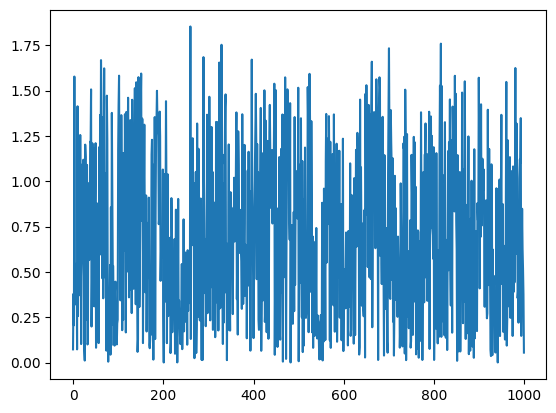

In [11]:
import matplotlib.pyplot as plt

def test(df: pd.DataFrame):
    diff_arr = []
    for row_idx in range(len(df)):
        scores = get_scores(df, row_idx)
        for score_idx, score in enumerate(scores):
            calc_score = get_rating(df, row_idx, score_idx)
            diff = abs(score - calc_score)
            diff_arr.append(diff)
    
    return diff_arr

diff = test(df)

plt.plot(np.arange(len(diff)), diff)